<a href="https://colab.research.google.com/github/ArsT1982/DSML-59-DZ-3/blob/main/DSML_59_DZ_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ДЗ-3.Оценка точности модели, переобучение, регуляризация

Угадываем признак пола спортсмена.

In [63]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов

In [64]:
# Загружаем данные
df = pd.read_csv("athletes.csv")
df.head(10)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
5,173071782,Aaron Royle,AUS,male,1/26/90,1.80,67.0,triathlon,0,0,0
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1
7,382571888,Aaron Younger,AUS,male,9/25/91,1.93,100.0,aquatics,0,0,0
8,87689776,Aauri Lorena Bokesa,ESP,female,12/14/88,1.80,62.0,athletics,0,0,0
9,997877719,Ababel Yeshaneh,ETH,female,7/22/91,1.65,54.0,athletics,0,0,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [66]:
# удаляем ячейки с отсутствием данных
df = df[~(df['height'].isna())]
df = df[~(df['weight'].isna())]

In [67]:
print("Количество пропущенных значений по столбцам:")
print(df.isnull().sum())

Количество пропущенных значений по столбцам:
id             0
name           0
nationality    0
sex            0
dob            0
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
dtype: int64


In [68]:
df.head(10)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
5,173071782,Aaron Royle,AUS,male,1/26/90,1.80,67.0,triathlon,0,0,0
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1
7,382571888,Aaron Younger,AUS,male,9/25/91,1.93,100.0,aquatics,0,0,0
8,87689776,Aauri Lorena Bokesa,ESP,female,12/14/88,1.80,62.0,athletics,0,0,0
9,997877719,Ababel Yeshaneh,ETH,female,7/22/91,1.65,54.0,athletics,0,0,0


In [69]:
selectedColumns = df[['height', 'sport', 'sex']]
selectedColumns.head()

,height,sport,sex
0,1.72,athletics,male
1,1.68,fencing,female
2,1.98,athletics,male
3,1.83,taekwondo,male
4,1.81,cycling,male


In [70]:
X = pd.get_dummies(selectedColumns, columns=['sport'], dtype = 'int', drop_first=True)
del X['sex']

print('Пометили вид спорта спортсмена единичкой.')
X.head()

Пометили вид спорта спортсмена единичкой.


,height,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,sport_cycling,sport_equestrian,sport_fencing,sport_football,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['sex'])
y = pd.Series(data=le.transform(df['sex']))
y.head()

,0
0,1
1,0
2,1
3,1
4,1


In [72]:
from sklearn.pipeline import make_pipeline  # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

ROC-кривая через sklearn

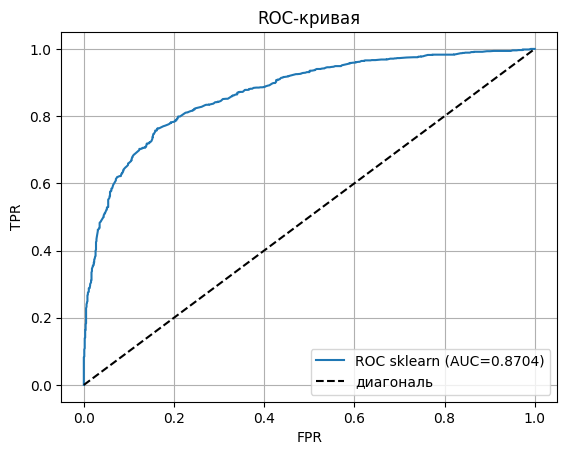

In [79]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

predictions = model.predict_proba(X_test)[:,1]
fpr_sk, tpr_sk, _ = roc_curve(y_test, predictions)
auc_sk = roc_auc_score(y_test, predictions)

plt.plot(fpr_sk, tpr_sk, label=f'ROC sklearn (AUC={auc_sk:.4f})')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')
plt.plot([0,1], [0,1], 'k--', label='диагональ')  # диагональная линия
plt.legend()
plt.grid()
plt.show()

Ручной подсчёт TPR/FPR и ROC-кривая

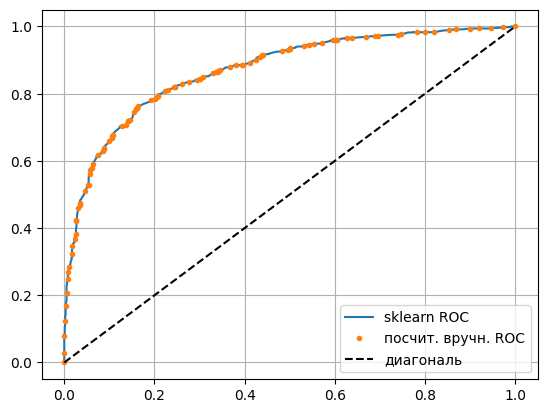

In [75]:
def calc_tpr_fpr(y_true, scores, thresh):
    preds = (scores >= thresh).astype(int)
    TP = ((y_true==1)&(preds==1)).sum()
    TN = ((y_true==0)&(preds==0)).sum()
    FP = ((y_true==0)&(preds==1)).sum()
    FN = ((y_true==1)&(preds==0)).sum()
    tpr = TP/(TP+FN) if TP+FN>0 else 0
    fpr = FP/(FP+TN) if FP+TN>0 else 0
    return tpr, fpr

thresholds = np.linspace(0,1,101)
tpr_man, fpr_man = zip(*[calc_tpr_fpr(y_test, predictions, thr) for thr in thresholds])

# Совмещаю для сранения (ручного и sklearn) результатов
plt.plot(fpr_sk, tpr_sk, label='sklearn ROC')
plt.plot(fpr_man, tpr_man, '.', label='посчит. вручн. ROC')
plt.plot([0,1], [0,1], 'k--', label='диагональ')  # диагональная линия
plt.legend()
plt.grid()
plt.show()


ROC Curves (синяя кривая  и оранжевые точки) «поднимаются» к левому верху — чем круче, тем лучше модель.

Precision-Recall кривая вручную

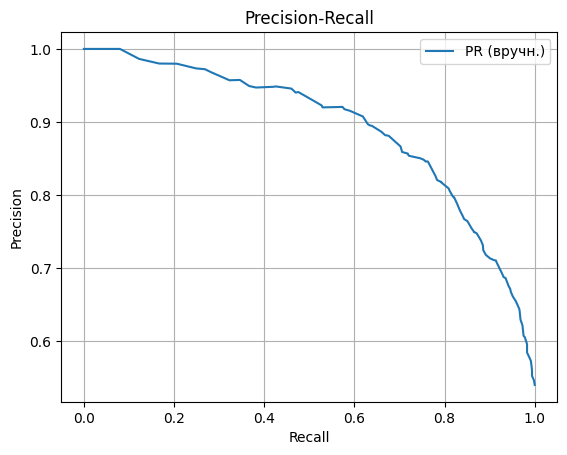

In [76]:
def calc_prec_rec(y_true, scores, thresh):
    preds = (scores >= thresh).astype(int)
    TP = ((y_true==1)&(preds==1)).sum()
    FP = ((y_true==0)&(preds==1)).sum()
    FN = ((y_true==1)&(preds==0)).sum()
    precision = TP/(TP+FP) if TP+FP>0 else 1
    recall = TP/(TP+FN) if TP+FN>0 else 0
    return precision, recall

precisions, recalls = zip(*[calc_prec_rec(y_test, predictions, thr) for thr in thresholds])

plt.plot(recalls, precisions, label='PR (вручн.)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall')
plt.legend()
plt.grid()
plt.show()


График presition-recall показывает, как меняются precision и recall на разных порогах.

*ROC-AUC вручную.

Для нахождения площади под кривой (интегрирования с помощью фнкции NumPy - np.trapezoid)  необходимо убедиться, что tpr_man и fpr_man - отсортированы по возрастанию.

In [77]:
# сортируем по FPR
order = np.argsort(fpr_man)

auc_manual = np.trapezoid(np.array(tpr_man)[order], np.array(fpr_man)[order])
print(f"ROC AUC (вручн.) = {auc_manual:.4f}")

ROC AUC (вручн.) = 0.8703


Итоговый вывод:

a) ROC-кривая (синяя кривая и оранжевые точки) «поднимается» к левому верху. При этом чем круче, тем лучше модель.
Судя по графику и значениям TPR и FPR для каждого порога - модель качественно пердсказывает класс (пол спортсмена). Если это было не так - кривая бы стремилась к диагонали.

Sklern и ручные вычсления:
ROC-кривые (синий график и оранж. точки) лежат почти друг на друге.
ROC AUC sklearn = 0,8704,
ручной подсчет = 0,8703
Т.е. практически совпадают (разница в 4 знаке после запятой, возможно рез-тат немного отличается из-за выбранного мной метода вычисления площади под кривой)
Заключение: Всё работает корректно, ручные расчёты дали те же результаты, что и готовые функции.

b)* Да, я думаю, что ROC-кривая вполне может лежать ниже диагонали - если модель будет чаще давать более неправильные, чем правильные ответы (например, она постоянно будет «угадывть наоборот»), тогда для многих порогов TPR окажется меньше FPR, и кривая уйдёт вниз.
